<a href="https://colab.research.google.com/github/fabiobaroliveira/analise_exploratoria_de_dados/blob/main/projeto_vendas_suplementos/analise_exploratoria_vendas_suplementos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Vendas de Suplementos



# Tópicos

1. Introdução e Preparação Inicial dos Dados
2. Limpeza e Pré-processamento de Dados
3. Análises
4. Insights e Conclusões


## 1. Introdução

- Objetivo dessa análise é identificar padrões de consumo e possíveis oportunidades não exploradas no negócio.

- Os dados são de um dataset retirado do Kaggle, com o nome originalmente "[Supplement Sales Data](https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data/data)" ele contém dados de vendas semanais de uma variedade de suplementos de saúde e bem-estar através de plataformas de e-comerce em diferentes países.

## 2. Carregamento e Inspeção Inicial

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import kagglehub

In [2]:
# Download versão mais atual
path = kagglehub.dataset_download("zahidmughal2343/supplement-sales-data")
print("Path to dataset files:", path)

100%|██████████| 65.2k/65.2k [00:00<00:00, 30.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zahidmughal2343/supplement-sales-data/versions/1


In [ ]:
# Carrega arquivo baixado
file_path = '/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv'
df = pd.read_csv(file_path)

In [3]:
# Carrega arquivo baixado
file_path = '/root/.cache/kagglehub/datasets/zahidmughal2343/supplement-sales-data/versions/1/Supplement_Sales_Weekly_Expanded.csv'
df = pd.read_csv(file_path)

In [4]:
#Verificando as primeiras linhas
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
#Verificando as últimas linhas
df.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178,39.12,6963.36,0.23,0,UK,iHerb


In [ ]:
#Verificando informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [ ]:
# Estastisticas categoricas
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [ ]:
# Estatisticas não categoricas
df.describe(include='object')

,Date,Product Name,Category,Location,Platform
count,4384,4384,4384,4384,4384
unique,274,16,10,3,3
top,2025-03-31,Whey Protein,Vitamin,Canada,iHerb
freq,16,274,822,1507,1499


In [ ]:
# Confirmando que não há valores nulos
print(df.isnull().sum())


Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


## 3.Análises

In [ ]:
# Receita total

receita_total = df['Revenue'].sum()
print(f"Receita Total: ${receita_total:,.2f}")

Receita Total: $22,913,280.45


In [13]:
receita_por_pais = df.groupby('Location')['Revenue'].sum().sort_values(ascending=False)
print("Receita por país")

for pais, receita in receita_por_pais.items():
    print(f"{pais}: ${receita:,.2f}")

Receita por país
Canada: $7,848,579.73
UK: $7,703,960.34
USA: $7,360,740.38


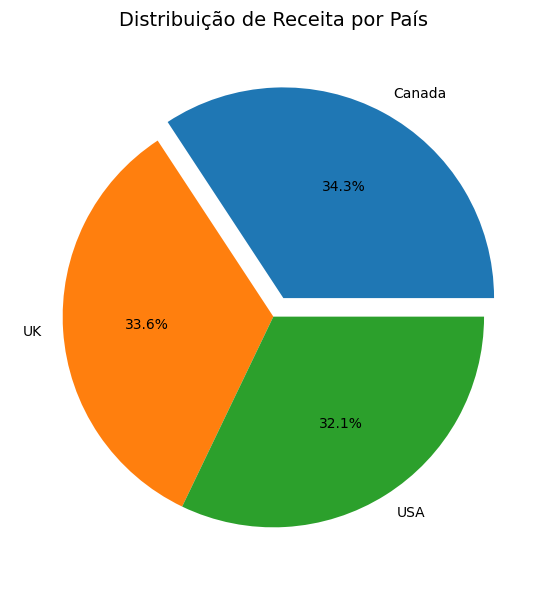

In [20]:
import matplotlib.pyplot as plt

# Agrupar dados
# receita_por_pais = df.groupby('Location')['Revenue'].sum().sort_values(ascending=False)

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.pie(receita_por_pais,
        labels=receita_por_pais.index,
        autopct='%1.1f%%', # Formata o numero em percentual, no caso uma casa decimal
        startangle=0,
        explode=[0.1 if i == 0 else 0 for i in range(len(receita_por_pais))],  # Destaca o primeiro item
        textprops={'fontsize': 10})

# Adicionando título
plt.title('Distribuição de Receita por País', pad=20, fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [22]:
# Receita por plataforma

receita_por_plataforma = df.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)
print("Receita por plataforma")

for plataforma, receita in receita_por_plataforma.items():
    print(f"{plataforma}: ${receita:,.2f}")

Receita por plataforma
iHerb: $7,855,261.05
Amazon: $7,669,451.78
Walmart: $7,388,567.62


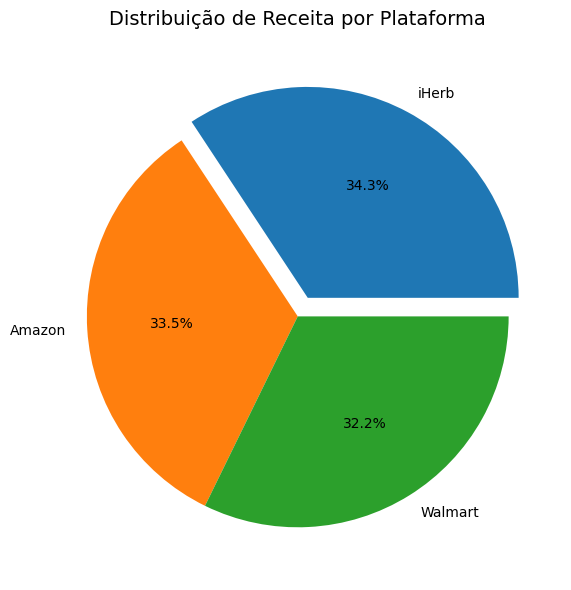

In [23]:
# import matplotlib.pyplot as plt

# Agrupar dados
# receita_por_plataforma = df.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.pie(receita_por_plataforma,
        labels=receita_por_plataforma.index,
        autopct='%1.1f%%', # Formata o numero em percentual, no caso uma casa decimal
        startangle=0,
        explode=[0.1 if i == 0 else 0 for i in range(len(receita_por_pais))],  # Destaca o primeiro item
        textprops={'fontsize': 10})

# Adicionando título
plt.title('Distribuição de Receita por Plataforma', pad=20, fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [29]:
# Categorias Mais Vendidas

categorias_mais_vendidas = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
print("Categorias Mais Vendidas")

for categoria, quantidade in categorias_mais_vendidas.items():
    print(f"{categoria}: {quantidade:,}")

Categorias Mais Vendidas
Mineral: 123,668
Vitamin: 123,434
Performance: 82,523
Protein: 82,120
Herbal: 41,408
Omega: 41,325
Sleep Aid: 41,165
Hydration: 41,065
Amino Acid: 41,027
Fat Burner: 40,743


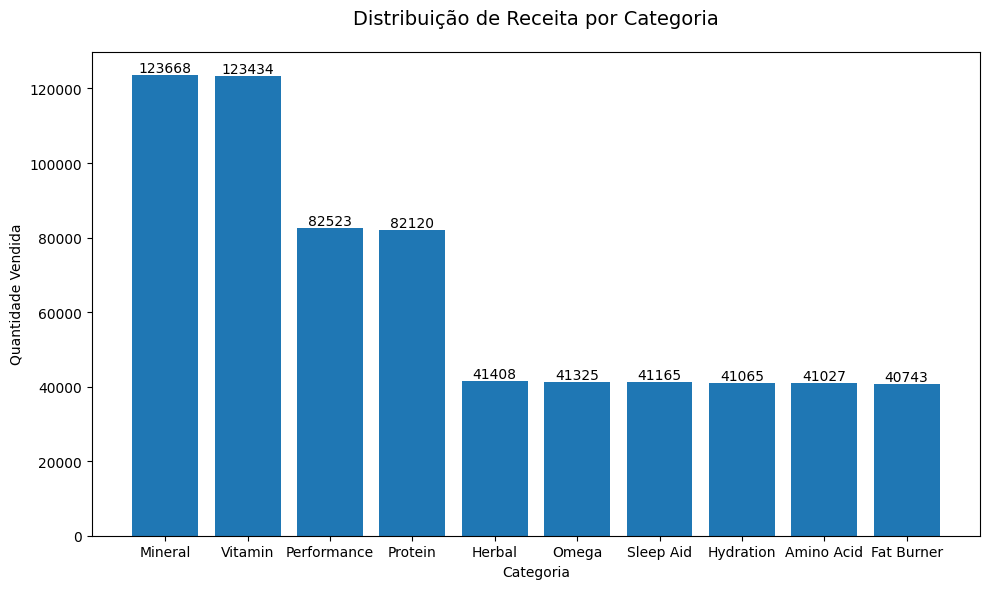

In [41]:
# import matplotlib.pyplot as plt

# Agrupar dados

# categorias_mais_vendidas = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)

# Cria o gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(categorias_mais_vendidas.index,categorias_mais_vendidas.values) # Colocando o grafico em uma variavel
plt.ylabel('Quantidade Vendida')
plt.xlabel('Categoria')

plt.bar_label(barras,categorias_mais_vendidas.values) # Adicionando rotulos

# Adicionando título
plt.title('Distribuição de Receita por Categoria', pad=20, fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()
